(tutorial_3)=
# Single subject
Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>  
Adapted from the tutorial proposed by the HMeta-d toolbox: https://github.com/metacoglab/HMeta-d/tree/master/CPC_metacog_tutorial

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from metadpy.bayesian import hmetad

sns.set_context("talk")

In [2]:
# Create responses data
nR_S1 = np.array([52, 32, 35, 37, 26, 12, 4, 2])
nR_S2 = np.array([2, 5, 15, 22, 33, 38, 40, 45])

## Using metadpy

In [3]:
model, traces = hmetad(nR_S1=nR_S1, nR_S2=nR_S2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/anaconda3/lib/python3.8/site-packages/multipledispatch/dispatcher.py:27: AmbiguityWarning: 
Ambiguities exist in dispatched function _unify

The following signatures may result in ambiguous behavior:
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[ConstrainedVar, object, Mapping], [object, ConstrainedVar, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, Var, Mapping]
	[ConstrainedVar, object, Mapping], [object, ConstrainedVar, Mapping]


Consider making the following additions:

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c1, d1, met

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


## Using HMeta-d

The results were generated by the `example_metad_indiv.R` file.

In [4]:
hmetad_df = pd.read_csv("./hmetad/metad_indiv.txt", sep="\t")

## Comparison

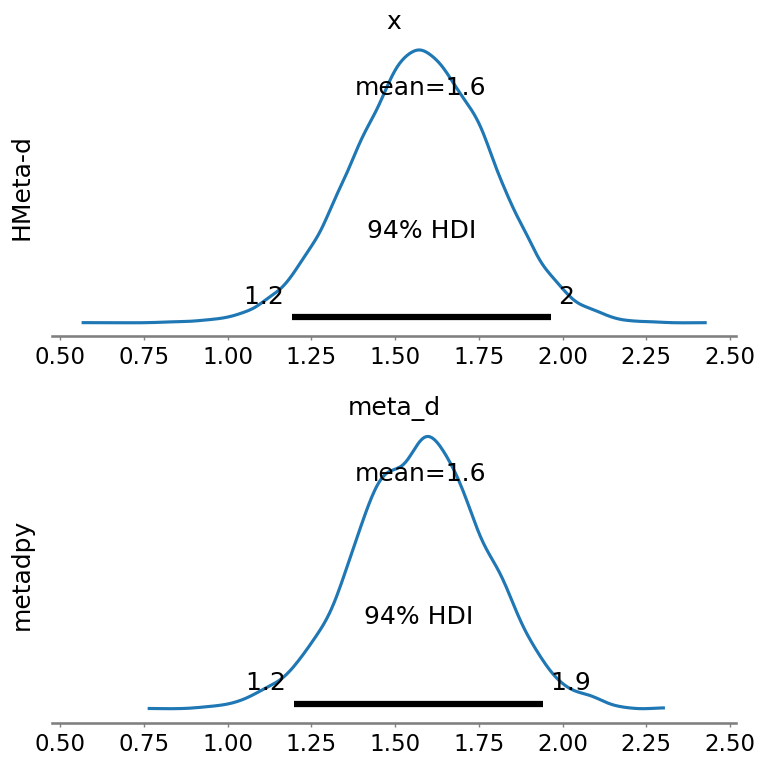

In [5]:
_, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
az.plot_posterior(hmetad_df.meta_d.to_numpy(), ax=axs[0])
az.plot_posterior(traces, var_names=["meta_d"], ax=axs[1])

axs[0].set_ylabel("HMeta-d")
axs[1].set_ylabel("metadpy")

plt.tight_layout()